<a href="https://colab.research.google.com/github/RubingLi123/foster_2023spring/blob/2023sp-master/Homeworks/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#If opening in colab run this cell
!git clone https://github.com/CTVisMe/DS4B_Sp24.git
%cd DS4B_Sp24/Homeworks/

fatal: destination path 'DS4B_Sp24' already exists and is not an empty directory.
/content/DS4B_Sp24/Homeworks


## # IF OPENING IN COLAB, REMEMBER TO SAVE THIS NOTEBOOK TO YOUR GOOGLE DRIVE!

# HW2: Predicting Patient Show-Up

The purpose of this part of the homework is to get you up to speed with data manipulation and model fitting using Python. These are the skills you will need to have for your term project.

### Background

You've been hired as the manager of Sacred Heart Medical Clinic (SHMC). As part of its business model, SHMC usually employs doctors on demand, meaning that doctors are asked to come only when there are appointments. However, once a doctor has been asked to come, you must pay him or her regardless of whether the patient shows up or not. You want to use data on previous appointments to figure out whether you can predict which patients are going to show up, so that you can plan better how many doctors to call.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the data containing past appointments (Remember to change this to the specific path of your data).
data_path = "./data/data-hw2.csv"

### Loading the data

**1. Load the data referenced by the path above into a pandas data frame. Print the total number of rows and columns, and show the first few rows in the dataset.**

In [3]:
# Put your answer here
df = pd.read_csv(data_path)
print(f"Number of Rows {df.shape[0]}")
print(f"Number of Columns {df.shape[1]}")
df.head()

Number of Rows 110527
Number of Columns 14


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here's a brief summary of the variables you should see:

1. PatientId - Identification of a patient.
2. AppointmentID - Identification of each appointment.
3. Gender - Male or female.
4. ScheduledDay - The day someone called or registered the appointment.
6. AppointmentDay - The day of the actual appointment, when the patient has to visit the doctor.
7. Age = How old is the patient.
8. Neighborhood - Place where the patient lives.
9. Scholarship - Whether the patient receives financial help.
10. Hypertension - Whether the patient suffers from hypertension.
11. Diabetes - Whether the patient suffers from diabetes.
12. Alcoholism - Whether the patient suffers from alcoholism.
13. Handicap - Whether the patient is handicapped.
14. SMS_received - Whether 1 or more SMS messages were sent to the patient
15. No-show - Whether the patient missed the appointment.

**2. Check out if there are any Na or NaN values. If there are any, drop all the observations that include such values in any of the columns.** (This is not necessarily what you should do in your projects)

In [4]:
# Put your answer here
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighborhood      0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

In [5]:
df.dropna()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


### Dealing with dates

**3. Transform ScheduledDay and AppointmentDay into datetimes (Hint: Use pandas for this).**

In [6]:
# Put your answer here
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**4. If you take a look at both dates, you will see that ScheduledDay includes a specific time with the date, but AppointmentDay doesn't. In order to compare both fields more easily, apply "normalize" to ScheduledDay (i.e., keep only the dates). Hint: See the [normalize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.normalize.html) method.**

In [7]:
# Put your answer here
df['ScheduledDay']= df['ScheduledDay'].dt.normalize()

**5. Create a new column called 'TimeInAdvance' for the difference in days between ScheduledDay and AppointmentDay. Make sure that the new field is numeric - and not of form "TimeDelta", which is the difference between two datetimes. (you can apply `dt.days`  to a datetime object to accomplish this).**

In [8]:
# Put your answer here
from datetime import datetime

In [9]:
df['TimeInAdvance']= (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [10]:
df['TimeInAdvance'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: TimeInAdvance, dtype: float64

There are many other features you may want to extract from date variables, such as the time at which the appointment was scheduled, the day of the week, the month, etc. However, we will only use TimeInAdvance for the purposes of this homework.

### Cleaning data

**6. Use the "describe" command from pandas to obtain some general stats about the data. Comment on any weird values you see in any of the columns? Remove all observations that include "weird" or otherwise questionable values and comment on why did you remove such observations. Also, print the number of observations you removed.**

In [11]:
# Put your answer here
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,TimeInAdvance
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


**Comment on any weird values you see in any of the columns?** </br>
From the output provided, we can observe several potential issues in the data:

1. Age: There is a minimum value of -1, which is not a valid age. This might indicate an error or missing data.
2. TimeInAdvance: There are negative values, which do not make sense because it represents the difference in days between the appointment scheduling and the actual appointment.

To address these issues, we will remove observations with weird or questionable values in the 'Age' and 'TimeInAdvance' columns.

In [12]:
((df['Age']<0) | (df['TimeInAdvance']<0)).sum()

6

In [13]:
df = df[(df['Age'] >= 0) & (df['TimeInAdvance']>=0)]

In [14]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589980e+14,5642503,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262960e+12,5642549,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679510e+11,5642828,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841190e+12,5642494,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,3.596270e+12,5650093,F,2016-05-03 00:00:00+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,1.557660e+13,5630692,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,9.213490e+13,5630323,F,2016-04-27 00:00:00+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41


### Dealing with binary variables

**7. Create a new column called "IsFemale" that is 1 if the patient is female and 0 otherwise. Hint: Take a look at the [where](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.where.html) method. Make sure to also drop the Gender column.**

In [15]:
df.loc[:, 'isFemale'] = np.where(df['Gender'] == 'F', 1, 0)
df.drop(columns=['Gender'], inplace=True, axis=1)

<ipython-input-15-4b1eda0a1caa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'isFemale'] = np.where(df['Gender'] == 'F', 1, 0)
<ipython-input-15-4b1eda0a1caa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gender'], inplace=True, axis=1)


In [16]:
df['isFemale']

0         1
1         0
2         1
3         1
4         1
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: isFemale, Length: 110521, dtype: int64

**8. Do the same for the No-show variable. It should be 1 if the person didn't show and 0 otherwise.**

In [17]:
# Put your answer here
df['No-show'] = np.where(df['No-show']=='Yes', 1, 0)
df['No-show']

<ipython-input-17-9549755a67fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No-show'] = np.where(df['No-show']=='Yes', 1, 0)


0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No-show, Length: 110521, dtype: int64

### Dealing with categorical variables

**9. Let's take a look at the Neighbordhood column. How many unique neighborhoods are there? Which are the 5 most common neighborhoods? Which are the 5 least common ones?**

In [18]:
# Put your answer here
unique_neighborhoods = df['Neighborhood'].nunique()
unique_neighborhoods

81

In [19]:
count = df['Neighborhood'].value_counts()
count.iloc[:5]

JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4430
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: Neighborhood, dtype: int64

In [20]:
count.iloc[-5:]

ILHA DO BOI                    35
ILHA DO FRADE                  10
AEROPORTO                       8
ILHAS OCEÂNICAS DE TRINDADE     2
PARQUE INDUSTRIAL               1
Name: Neighborhood, dtype: int64

**10. We often group together categories that are very rare because it's hard to generalize from them. Use .value_counts to find the total in each neighborhood.  Then, for the neighborhoods that appear less than 2000 times in the dataset replace their name with "OTHER". (Code provided below:)**

In [21]:
# sample code - make sure to replace "df" with your data frame name if needed
counts = df['Neighborhood'].value_counts()
minor = counts[counts < 2000].index
df.loc[df['Neighborhood'].isin(minor), 'Neighborhood'] = 'OTHER'

In [22]:
df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,TimeInAdvance,isFemale
0,2.987250e+13,5642903,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,1
1,5.589980e+14,5642503,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,0
2,4.262960e+12,5642549,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,OTHER,0,0,0,0,0,0,0,0,1
3,8.679510e+11,5642828,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,OTHER,0,0,0,0,0,0,0,0,1
4,8.841190e+12,5642494,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,1


**11. Get dummy/indicator variables for each neighborhood and add them to the dataframe. Hint: Take a look at the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method (note - in class we discussed the need to create k-1 dummies if there are k categories when doing regression.  We do NOT have to do this with trees.  Tree models do not require creation of a baseline dummy variable - so you can use drop_first=False with `get_dummies`, which is the default.). Make sure to add the dummies to your data frame, and also drop the Neighborhood column once the dummies are created.**

In [23]:
# Put your answer here
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first=False)

In [24]:
df.columns

Index(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No-show', 'TimeInAdvance', 'isFemale',
       'Neighborhood_ANDORINHAS', 'Neighborhood_BONFIM',
       'Neighborhood_CARATOÍRA', 'Neighborhood_CENTRO',
       'Neighborhood_DA PENHA', 'Neighborhood_GURIGICA',
       'Neighborhood_ILHA DO PRÍNCIPE', 'Neighborhood_ITARARÉ',
       'Neighborhood_JABOUR', 'Neighborhood_JARDIM CAMBURI',
       'Neighborhood_JARDIM DA PENHA', 'Neighborhood_JESUS DE NAZARETH',
       'Neighborhood_MARIA ORTIZ', 'Neighborhood_NOVA PALESTINA',
       'Neighborhood_OTHER', 'Neighborhood_RESISTÊNCIA', 'Neighborhood_ROMÃO',
       'Neighborhood_SANTA MARTHA', 'Neighborhood_SANTO ANDRÉ',
       'Neighborhood_SANTO ANTÔNIO', 'Neighborhood_SÃO PEDRO',
       'Neighborhood_TABUAZEIRO'],
      dtype='object')

### Dealing with panel data


There are many patients that have made more than one appointment. Panel data (also called longitudinal data) contain observations for the same individuals over multiple periods of time. In our particuclar case, such data may help us to make better predictions.

For example, the fact that a patient has failed to show up in the past may be predictive of the patient not showing up in the future. We want to create a variable that calculates the number of no_shows BEFORE the current appointment..this is advanced so we give you the code to create this attribute.

**12. Create a new column called "PreviousNoShows" that for each appointment includes the number of past appointments to which the patient did not show. For example, if the person did not show to the first meeting, PreviousNoShows should be 0 for the first appointment and 1 for the second one (if there is any). (Code provided: Sort the dataframe by PatientID and ScheduledDay. Then, group by PatientID and compute the cumulative sum of the No-show variable)**

In [25]:
# sample code - make sure to replace "df" with your data frame name
df = df.sort_values(['PatientId', 'ScheduledDay'])
df['PreviousNoShows'] = df.groupby(['PatientId'])['No-show'].cumsum()

There are many other features we could compute with this data set, such as time between appointments, number of past appointments, fraction of appointments to which the patient did not show up, etc. However, for the purposes of this homework, we will only work with PreviousNoShows.

### Removing the unnecessary

**13. Let's drop the columns we won't be needing. Drop PatientId, AppointmentID, ScheduledDay, AppointmentDay.**

In [26]:
# Put your answer here
df.drop(['PatientId','AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

### Predictive modeling

**14. Let's build a model to predict No-Show using a DecisionTreeClassifier. First, split the data into training and test (80/20) - using `random_state=123`.  Using max_depth=3, fit the DecisionTreeClassifier to the training set, and report the accuracy on the training set and the test set.**


In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score
# Put your answer here

X,y = df.drop(columns=['No-show']), df['No-show']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

model = DecisionTreeClassifier(max_depth=3, criterion='entropy').fit(X_train, y_train)
y_pred_tr = model.predict(X_train)
y_pred_ts = model.predict(X_test)

print(f"Training Accuracy: {round(accuracy_score(y_pred_tr, y_train),3)}")
print(f"Test Accuracy: {round(accuracy_score(y_pred_ts, y_test),3)}")

Training Accuracy: 0.923
Test Accuracy: 0.919


**15. Now lets do 5-fold cross validation by calling cross_val_score with the FULL X and y data (the function does the splitting and fitting for us). Use the option `scoring="accuracy"`.  Find the mean accuracy of the 5 numbers returned.**

In [28]:
# Put your answer here
cross_val_score(DecisionTreeClassifier(max_depth=3, criterion='entropy'), X, y, cv=5 ).mean().round(3)

0.923

**16. Lets see what is the optimal depth for this tree. Create a for-loop that cycles over all max_depth values between 2 and 15 and prints out the mean cross-validated test accuracy for each value of max_depth.  Which value of max_depth has the highest cross-validated accuracy?**

In [29]:
# Put your answer here
mean_cv_accuracies = []

for max_depth in range(2, 16):
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
    mean_accuracy = cross_val_score(DecisionTreeClassifier(max_depth=max_depth, criterion='entropy'), X, y, cv=5 ).mean().round(5)
    mean_cv_accuracies.append(mean_accuracy)
    print("Max Depth:", max_depth, "Mean CV Accuracy:", mean_accuracy)

# Find the index of the max accuracy
optimal_depth = np.argmax(mean_cv_accuracies) + 2

# Print the value of max_depth with the highest cross-validated accuracy
print("\nOptimal max_depth:", optimal_depth, "with mean CV accuracy:", mean_cv_accuracies[optimal_depth])

Max Depth: 2 Mean CV Accuracy: 0.92241
Max Depth: 3 Mean CV Accuracy: 0.92256
Max Depth: 4 Mean CV Accuracy: 0.92317
Max Depth: 5 Mean CV Accuracy: 0.9232
Max Depth: 6 Mean CV Accuracy: 0.92305
Max Depth: 7 Mean CV Accuracy: 0.92239
Max Depth: 8 Mean CV Accuracy: 0.92189
Max Depth: 9 Mean CV Accuracy: 0.921
Max Depth: 10 Mean CV Accuracy: 0.91945
Max Depth: 11 Mean CV Accuracy: 0.91903
Max Depth: 12 Mean CV Accuracy: 0.91831
Max Depth: 13 Mean CV Accuracy: 0.91735
Max Depth: 14 Mean CV Accuracy: 0.91652
Max Depth: 15 Mean CV Accuracy: 0.91518

Optimal max_depth: 5 with mean CV accuracy: 0.92239


**16b (Extra Credit) : Using the same for-loop, output for each level of max_depth the trainging accuracy, test accuracy, and cross_val accuracy.  Make a plot of depth(X-axis) vs accuracy(Y-axis) with three lines for (train, test, and cv) accuracy.   Interpret what you see.**


Max Depth: 2 Training Accuracy: 0.923 Test Accuracy: 0.919 CV Accuracy: 0.922
Max Depth: 3 Training Accuracy: 0.923 Test Accuracy: 0.919 CV Accuracy: 0.923
Max Depth: 4 Training Accuracy: 0.924 Test Accuracy: 0.92 CV Accuracy: 0.923
Max Depth: 5 Training Accuracy: 0.924 Test Accuracy: 0.92 CV Accuracy: 0.923
Max Depth: 6 Training Accuracy: 0.924 Test Accuracy: 0.92 CV Accuracy: 0.923
Max Depth: 7 Training Accuracy: 0.924 Test Accuracy: 0.92 CV Accuracy: 0.922
Max Depth: 8 Training Accuracy: 0.925 Test Accuracy: 0.92 CV Accuracy: 0.922
Max Depth: 9 Training Accuracy: 0.925 Test Accuracy: 0.919 CV Accuracy: 0.921
Max Depth: 10 Training Accuracy: 0.927 Test Accuracy: 0.918 CV Accuracy: 0.919
Max Depth: 11 Training Accuracy: 0.928 Test Accuracy: 0.918 CV Accuracy: 0.919
Max Depth: 12 Training Accuracy: 0.93 Test Accuracy: 0.916 CV Accuracy: 0.918
Max Depth: 13 Training Accuracy: 0.932 Test Accuracy: 0.916 CV Accuracy: 0.917
Max Depth: 14 Training Accuracy: 0.934 Test Accuracy: 0.913 CV Acc

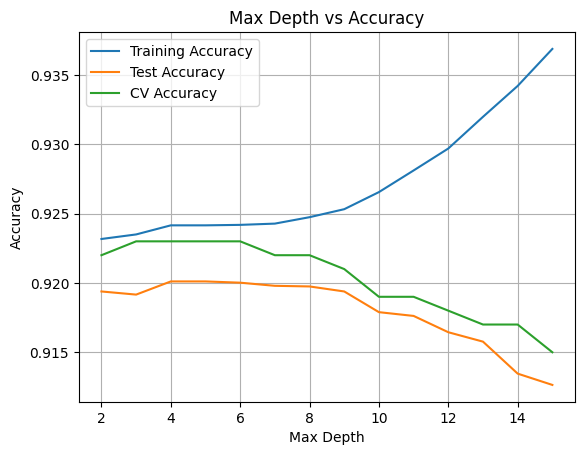

In [30]:
# Put your answer here
train_accuracies = []
test_accuracies = []
cv_accuracies = []

max_depth_values = range(2, 16)
for max_depth in max_depth_values:
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy')
    mean_accuracy = cross_val_score(dt_classifier, X, y, cv=5 ).mean().round(3)
    cv_accuracies.append(mean_accuracy)
    dt_classifier.fit(X_train, y_train)
    train_accuracy = accuracy_score(dt_classifier.predict(X_train), y_train)
    train_accuracies.append(train_accuracy)
    test_accuracy = accuracy_score(dt_classifier.predict(X_test), y_test)
    test_accuracies.append(test_accuracy)
    print("Max Depth:", max_depth, "Training Accuracy:", train_accuracy.round(3), "Test Accuracy:", test_accuracy.round(3), "CV Accuracy:", mean_accuracy.round(3))

# Plot depth versus accuracy
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy')
plt.plot(max_depth_values, test_accuracies, label='Test Accuracy')
plt.plot(max_depth_values, cv_accuracies, label='CV Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Interpret what you see**

The graph illustrates how the accuracy of a decision tree model changes with increasing maximum depth. Initially, as the depth increases, the training accuracy improves steadily, indicating better fitting to the training data. However, beyond a certain point, the test and cross-validation accuracies start to decline, suggesting overfitting.

**17.  Fit the tree model (again) using the optimal depth.  Create the 2x2 confusion matrix using the predictions on the test set, vs the true values of the test set (Y_test).**

In [31]:
# Put your answer here
from sklearn.metrics import confusion_matrix

dt_classifier = DecisionTreeClassifier(max_depth=optimal_depth)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[16336  1415]
 [  352  4002]]


**18. Use the functions `precision_score` and `recall_score` to calculate precision and recall - these numbers should correspond to the appropriate calculations from the 2x2 table.**

In [32]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision.round(3))
print("Recall:", recall.round(3))

Precision: 0.739
Recall: 0.919


**18b.(Extra Credit - 2 points) The precision and recall above were calculated using a threshold of 0.5 (that is, any case with a probability over 0.5 is predicted as No-show).  As we discussed in class, changing the threshold will have an effect on precision and recall.  Change the threshold of labelling a No-show to 0.9 and re-calcuate precision and recall.  (you will need to generate a new 2x2 table and calculate P&R from the values in the table). Interpret the change in P&R between the two thresholds.**

In [33]:
# Adjust predictions based on the new threshold
y_pred_thresholded = dt_classifier.predict_proba(X_test)[:, 1] > 0.9
# Create the new confusion matrix
conf_matrix_thresholded = confusion_matrix(y_test, y_pred_thresholded)

# Calculate precision with the new threshold
precision_thresholded = precision_score(y_test, y_pred_thresholded)

# Calculate recall with the new threshold
recall_thresholded = recall_score(y_test, y_pred_thresholded)

# Print precision and recall with the new threshold
print("Precision with threshold 0.9:", precision_thresholded.round(3))
print("Recall with threshold 0.9:", recall_thresholded.round(3))

# Print the new confusion matrix
print("Confusion Matrix with threshold 0.9:")
print(conf_matrix_thresholded)

Precision with threshold 0.9: 0.938
Recall with threshold 0.9: 0.18
Confusion Matrix with threshold 0.9:
[[17699    52]
 [ 3571   783]]


**Interpret the change in P&R between the two thresholds.**

The change in precision and recall between the two thresholds (0.5 and 0.9) is as follows:

1. **Precision**:
   - With the threshold of 0.5, precision was 0.739, meaning that 73.9% of the cases predicted as No-show were actually No-show.
   - With the threshold of 0.9, precision increased significantly to 0.938, indicating that 93.8% of the cases predicted as No-show were actually No-show.
   - The increase in precision suggests that with the higher threshold, the model is more confident in its predictions of No-show. It is making fewer false positive predictions (cases predicted as No-show but were not).

2. **Recall**:
   - With the threshold of 0.5, recall was 0.919, meaning that 91.9% of the actual No-show cases were correctly identified by the model.
   - With the threshold of 0.9, recall decreased substantially to 0.18, indicating that only 18% of the actual No-show cases were correctly identified by the model.
   - The decrease in recall suggests that with the higher threshold, the model is missing a larger portion of the actual No-show cases. It is becoming more conservative in labeling cases as No-show, leading to a higher number of false negatives (actual No-show cases predicted as not No-show).